In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import f_oneway
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM


drug= pd.read_csv('C:/Users/user/Desktop/Understand you data end_to_end project/Project_C/drug200.csv')

In [35]:
drug

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


# Show the first 5 rows 

In [36]:
drug.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [37]:
# Extract all elements from the 'Drug' column
# drugs = drug['Drug'].tolist()

# Print the list of drugs
# print(drugs)

In [38]:
# Get unique elements from the 'Drug' column
# unique_drugs = drug['Drug'].unique()

# Print the unique drugs
# for drug in unique_drugs:
    # print(drug)

In [39]:
# Select numeric columns
numeric_columns = drug.select_dtypes(include='number')

# Sum all numeric data in the DataFrame
sum_of_numeric_data = numeric_columns.sum()

# Display the sum of numeric data
print(sum_of_numeric_data)

Age        8863.000
Na_to_K    3216.897
dtype: float64


# Statistical information

In [40]:
drug.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


# Missing Data

In [41]:
print(drug.isnull().sum())

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64


# Discribe the Data

In [42]:
print(drug.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB
None


# Go ahead and show a density 

<Axes: ylabel='Density'>

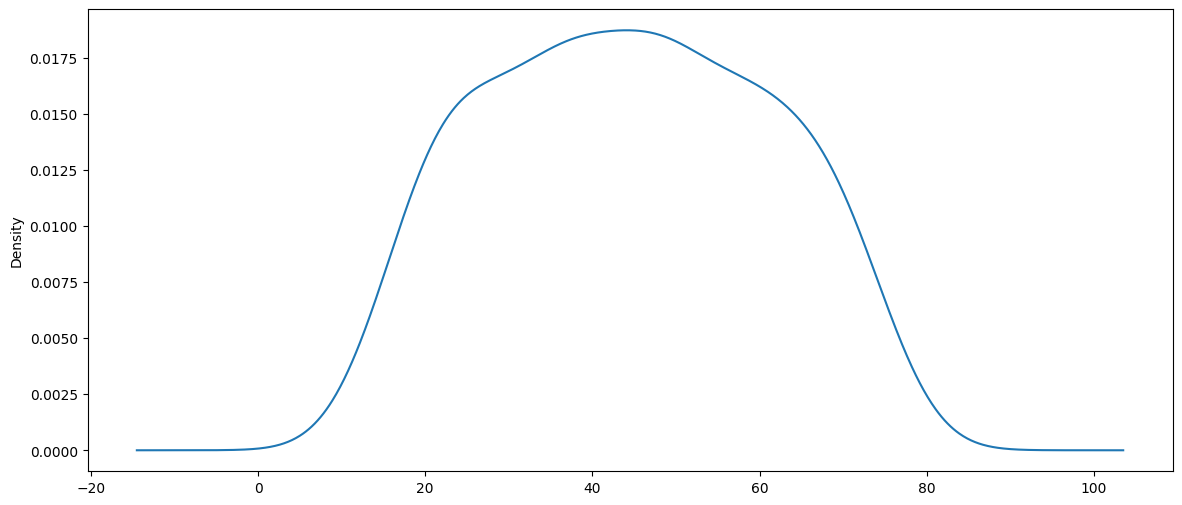

In [43]:
drug['Age'].plot(kind='kde', figsize=(14,6))

# Mean of Age

In [44]:
drug['Age'].mean()

44.315

# Blox-Plot of Na_to_K

<Axes: >

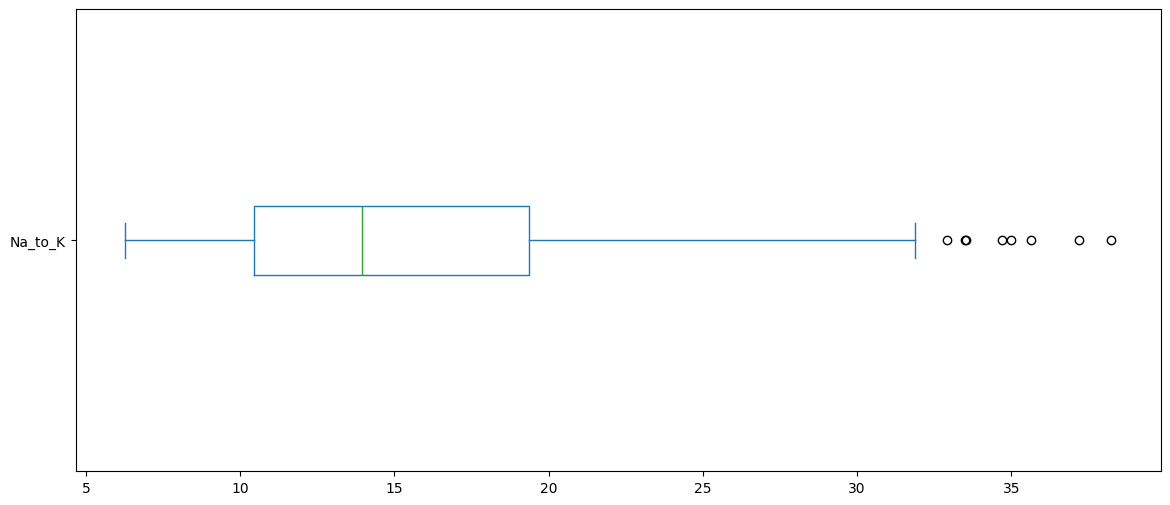

In [45]:
drug['Na_to_K'].plot(kind='box', vert=False, figsize=(14,6)) 

# Outliers

In [46]:
X = drug[['Na_to_K']]

# Isolation Forest
isolation_forest = IsolationForest(contamination=0.1)  # Contamination parameter sets the proportion of outliers
isolation_forest.fit(X)
outliers_isolation_forest = isolation_forest.predict(X)

# Local Outlier Factor (LOF)
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)  # n_neighbors parameter determines the number of neighbors to consider
outliers_lof = lof.fit_predict(X)

# One-Class SVM
one_class_svm = OneClassSVM(nu=0.1)  # nu parameter sets the proportion of outliers
one_class_svm.fit(X)
outliers_one_class_svm = one_class_svm.predict(X)

# Combining outlier predictions from all models
outliers_combined = outliers_isolation_forest + outliers_lof + outliers_one_class_svm
outliers_combined[outliers_combined < 0] = 0  # Replace negative values with 0
outliers_combined[outliers_combined > 0] = 1  # Replace positive values with 1

# Displaying outliers
outlier_indices = outliers_combined.nonzero()[0]
print("Indices of outliers:", outlier_indices)
print("Number of outliers:", len(outlier_indices))

Indices of outliers: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  25  26  27  28  29  30  31  32  34  36  37  38
  39  40  41  42  43  44  45  46  47  49  50  51  52  53  54  55  56  57
  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75
  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93
  94  95  97  99 100 101 102 103 104 105 106 107 108 109 110 112 113 114
 115 116 117 118 119 120 121 122 123 124 125 126 127 129 130 132 133 134
 135 136 137 138 139 141 142 143 144 145 146 147 148 149 150 151 153 154
 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172
 173 174 175 176 177 178 179 180 181 182 183 185 186 187 189 190 191 192
 195 196 197 198 199]
Number of outliers: 185


# Removing outliers

In [47]:
q3 = drug.Na_to_K.quantile(0.75)
q1 = drug.Na_to_K.quantile(0.25)

iqr = q3-q1

lower = q1 - 1.5 * iqr
upper= q3 + 1.5 * iqr
# filtering
data= drug[(drug['Na_to_K'] >= lower) & (drug['Na_to_K'] <= upper)]

<Axes: >

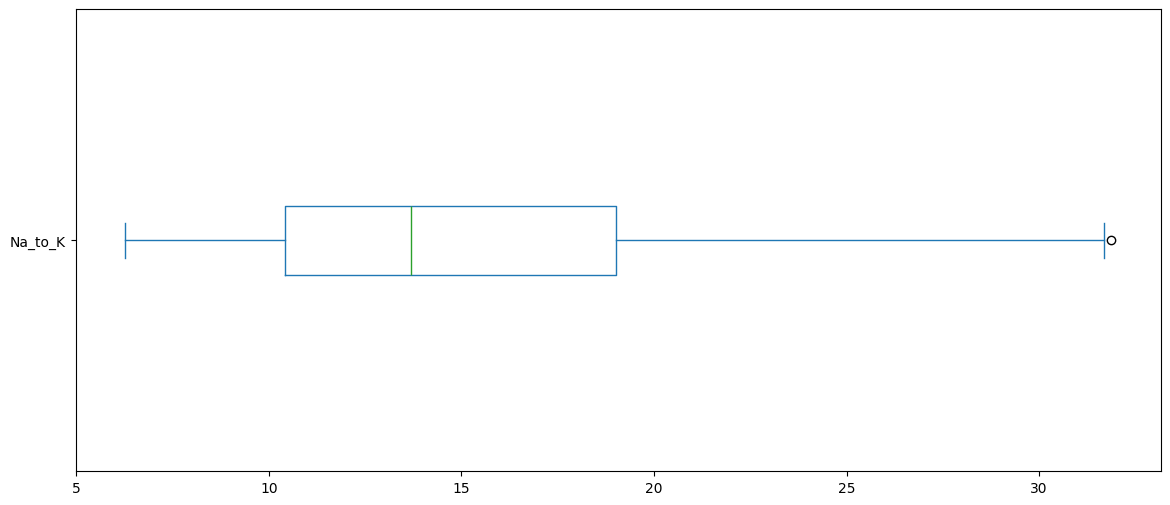

In [48]:
data['Na_to_K'].plot(kind='box', vert=False, figsize=(14,6)) 

<Axes: >

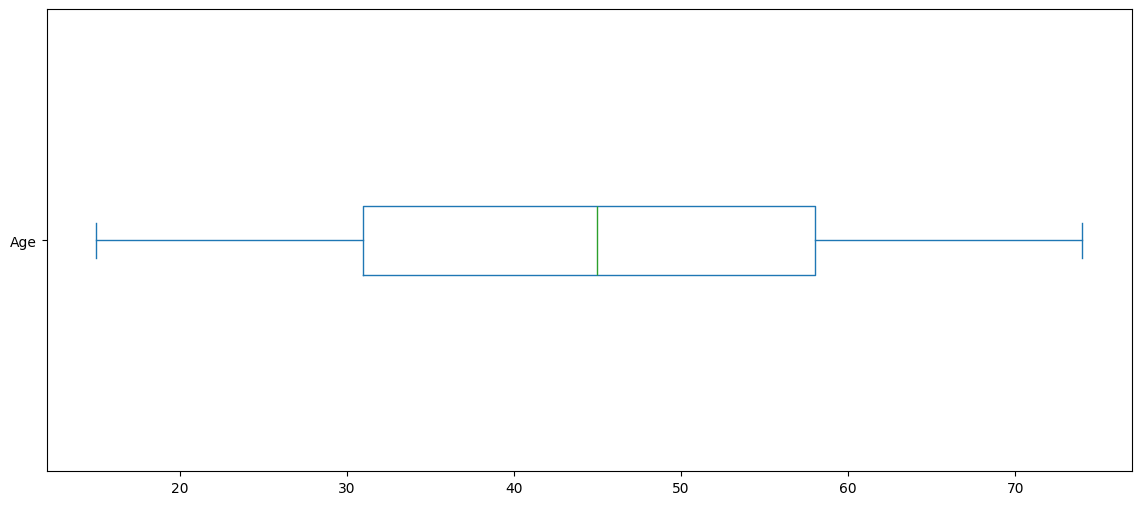

In [49]:
drug['Age'].plot(kind='box', vert=False, figsize=(14,6)) 

# Create a box plot to visualize the relationship between 'Age' and 'BP'

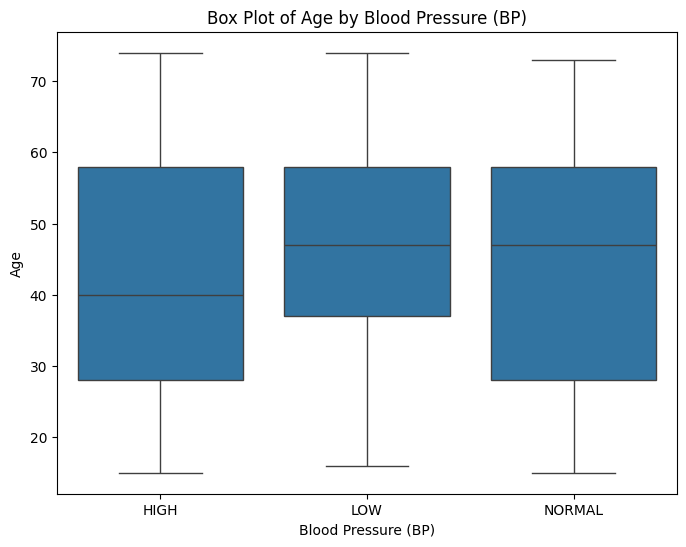

In [50]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='BP', y='Age', data=drug)
plt.title('Box Plot of Age by Blood Pressure (BP)')
plt.xlabel('Blood Pressure (BP)')
plt.ylabel('Age')
plt.show()


# Create a box plot to visualize the relationship between 'Age' and 'Cholesterol'

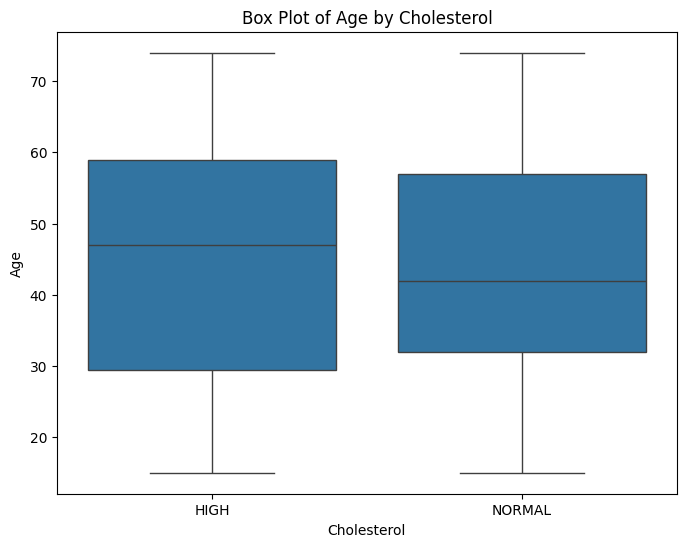

In [51]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Cholesterol', y='Age', data=drug)
plt.title('Box Plot of Age by Cholesterol')
plt.xlabel('Cholesterol')
plt.ylabel('Age')
plt.show()

# Filter the dataset for younger people according to BP (for example, those under 30 years old)

In [52]:
young_people = drug[drug['Age'] < 30]

# Calculate the distribution of blood pressure levels within the subset of younger people, by sex
bp_distribution = young_people.groupby(['Sex', 'BP']).size().unstack(fill_value=0)

print("Blood Pressure Distribution for Young People:")
print(bp_distribution)


Blood Pressure Distribution for Young People:
BP   HIGH  LOW  NORMAL
Sex                   
F      15    4       7
M       7    4      10


# Filter the dataset for younger people (for example, those over 30 years old)

In [53]:
young_people = drug[drug['Age'] > 30]

# Calculate the distribution of blood pressure levels within the subset of younger people, by sex
bp_distribution = young_people.groupby(['Sex', 'BP']).size().unstack(fill_value=0)

print("Blood Pressure Distribution for mature People:")
print(bp_distribution)

Blood Pressure Distribution for mature People:
BP   HIGH  LOW  NORMAL
Sex                   
F      23   24      22
M      32   32      19


# Filter the dataset for younger people according to Cholesterol (for example, those under 30 years old)

In [54]:
young_people = drug[drug['Age'] < 30]

# Calculate the distribution of blood pressure levels within the subset of younger people, by sex
bp_distribution = young_people.groupby(['Sex', 'Cholesterol']).size().unstack(fill_value=0)

# Print the distribution
print("Cholesterol Distribution for Young People:")
print(bp_distribution)

Cholesterol Distribution for Young People:
Cholesterol  HIGH  NORMAL
Sex                      
F              13      13
M              13       8


# Filter the dataset for younger people according to Cholesterol (for example, those under 30 years old)

In [55]:
# Filter the dataset for younger people (for example, those over 30 years old)
young_people = drug[drug['Age'] > 30]

# Calculate the distribution of blood pressure levels within the subset of younger people, by sex
bp_distribution = young_people.groupby(['Sex', 'Cholesterol']).size().unstack(fill_value=0)

# Print the distribution
print("Cholesterol Distribution for mature People:")
print(bp_distribution)

Cholesterol Distribution for mature People:
Cholesterol  HIGH  NORMAL
Sex                      
F              35      34
M              41      42


# Frequency of each drug

In [56]:
drug_frequency = drug['Drug'].value_counts()

# Print the frequency of each drug
print("Frequency of Each Drug:")
print(drug_frequency)


Frequency of Each Drug:
Drug
drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64


# Strip plot

C:\Users\user\AppData\Local\Temp\ipykernel_34796\1655984142.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Drug', y='Na_to_K', data=data , jitter=True, palette='Set2')


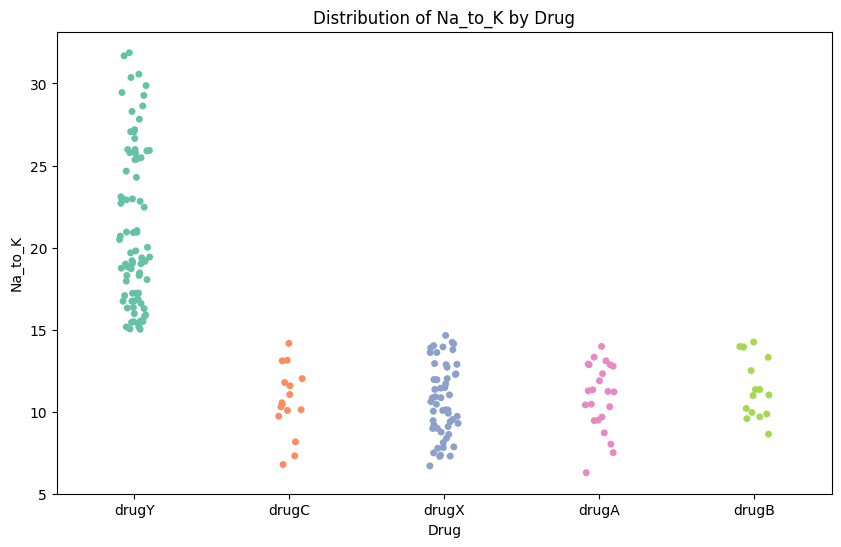

In [57]:
plt.figure(figsize=(10, 6))
sns.stripplot(x='Drug', y='Na_to_K', data=data , jitter=True, palette='Set2')
plt.title('Distribution of Na_to_K by Drug')
plt.xlabel('Drug')
plt.ylabel('Na_to_K')
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_34796\2475362302.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='BP', y='Drug', data=drug, jitter=True, palette='Set2')


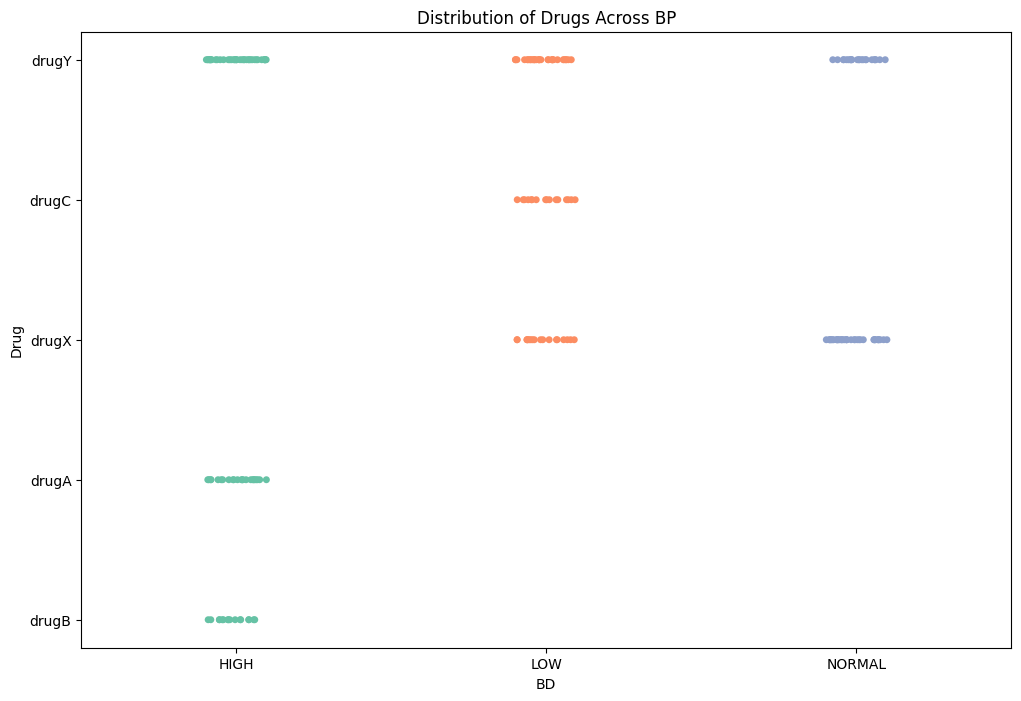

In [58]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Create a strip plot
sns.stripplot(x='BP', y='Drug', data=drug, jitter=True, palette='Set2')

# Set plot labels and title
plt.title('Distribution of Drugs Across BP')
plt.xlabel('BD')
plt.ylabel('Drug')

# Show the plot
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_34796\3779760514.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Cholesterol', y='Drug', data=drug, jitter=True, palette='Set2')


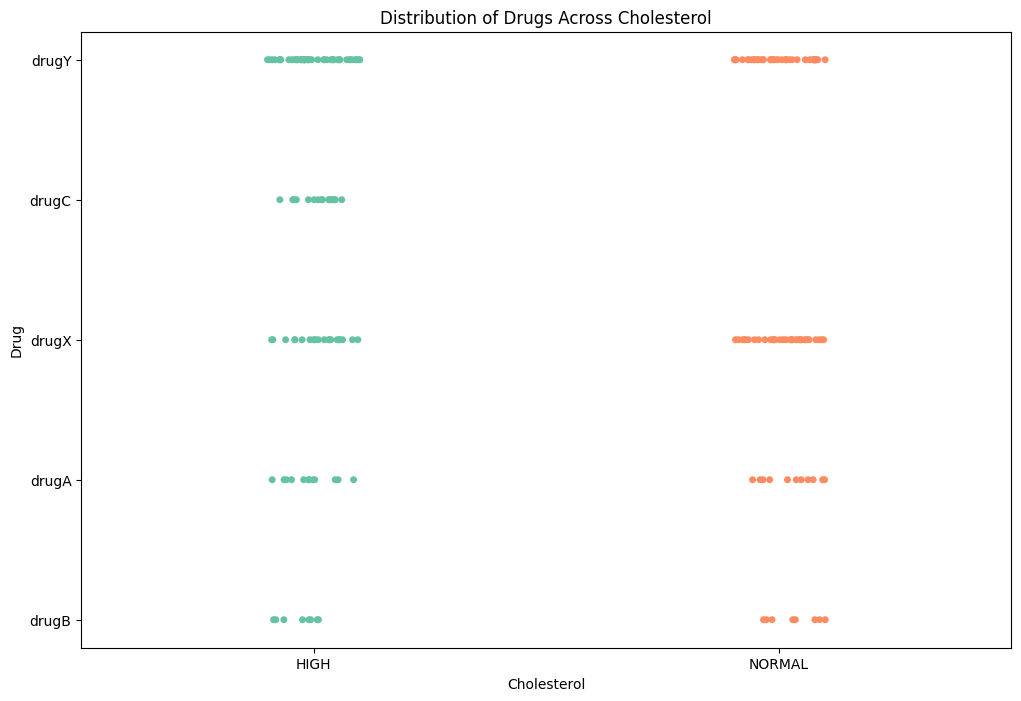

In [59]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Create a strip plot
sns.stripplot(x='Cholesterol', y='Drug', data=drug, jitter=True, palette='Set2')

# Set plot labels and title
plt.title('Distribution of Drugs Across Cholesterol')
plt.xlabel('Cholesterol')
plt.ylabel('Drug')

# Show the plot
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_34796\1813115691.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Age', y='Drug', data=data, jitter=True, palette='Set2', legend=False)


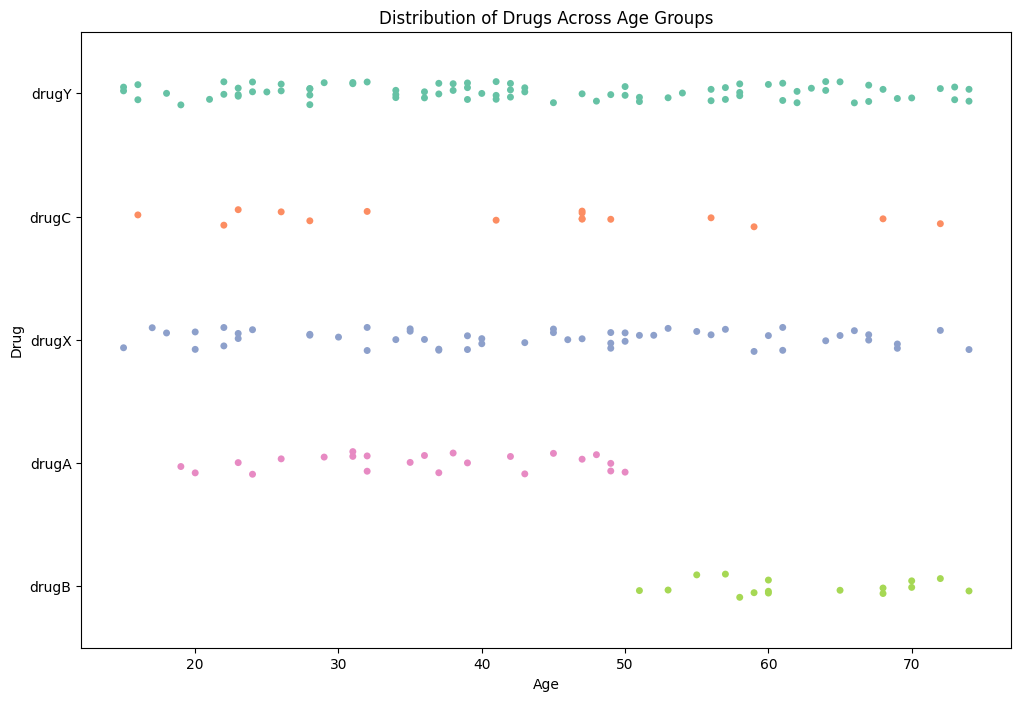

In [60]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Create a strip plot
sns.stripplot(x='Age', y='Drug', data=data, jitter=True, palette='Set2', legend=False)

# Set plot labels and title
plt.title('Distribution of Drugs Across Age Groups')
plt.xlabel('Age')
plt.ylabel('Drug')

# Show the plot
plt.show()




# One-way ANOVA

In [61]:
# Subset the DataFrame using .loc to avoid warning messages
drugB_data = data.loc[data['Drug'] == 'drugB', 'Na_to_K']
drugA_data = data.loc[data['Drug'] == 'drugA', 'Na_to_K']
drugX_data = data.loc[data['Drug'] == 'drugX', 'Na_to_K']
drugC_data = data.loc[data['Drug'] == 'drugC', 'Na_to_K']
drugY_data = data.loc[data['Drug'] == 'drugY', 'Na_to_K']

# Perform ANOVA
anova_result = f_oneway(drugB_data, drugA_data, drugX_data, drugC_data, drugY_data)

# Print ANOVA results
print("One-Way ANOVA Results:")
print("F-statistic:", anova_result.statistic)
print("P-value:", anova_result.pvalue)

# Interpret ANOVA results
alpha = 0.05
if anova_result.pvalue < alpha:
    print("Reject the null hypothesis. There are significant differences between treatment groups.")
else:
    print("Fail to reject the null hypothesis. There are no significant differences between treatment groups.")





One-Way ANOVA Results:
F-statistic: 101.01244584913017
P-value: 1.2097754264520418e-45
Reject the null hypothesis. There are significant differences between treatment groups.


In [62]:

# Calculate average effectiveness for each drug
average_effectiveness = data.groupby('Drug')['Na_to_K'].mean()

# Find the drug with the highest average effectiveness
best_drug = average_effectiveness.idxmax()  # Get the index of the maximum value

# Get the value of the best drug
best_effectiveness = average_effectiveness.max()

# Print the drug with the best effectiveness
print("The drug with the best effectiveness is:", best_drug)
print("Average effectiveness:", best_effectiveness)


The drug with the best effectiveness is: drugY
Average effectiveness: 21.149373493975904


# Tukey Method  a = 5%

In [63]:
# Perform Tukey's HSD test
tukey_result = pairwise_tukeyhsd(data['Na_to_K'], data['Drug'],alpha= 0.05)

# Print the summary of the Tukey HSD test
print(tukey_result)


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
 drugA  drugB   0.6056 0.9845 -2.5568   3.768  False
 drugA  drugC   -0.285 0.9992 -3.4475  2.8774  False
 drugA  drugX  -0.2682 0.9981  -2.687  2.1506  False
 drugA  drugY  10.2306    0.0  7.9415 12.5197   True
 drugB  drugC  -0.8906  0.953 -4.3251  2.5439  False
 drugB  drugX  -0.8738 0.9074 -3.6389  1.8912  False
 drugB  drugY    9.625    0.0  6.9727 12.2773   True
 drugC  drugX   0.0168    1.0 -2.7482  2.7819  False
 drugC  drugY  10.5156    0.0  7.8633  13.168   True
 drugX  drugY  10.4988    0.0  8.8004 12.1972   True
----------------------------------------------------


# a = 1%

In [64]:
# Perform Tukey's HSD test
tukey_result = pairwise_tukeyhsd(data['Na_to_K'], data['Drug'],alpha= 0.01)

# Print the summary of the Tukey HSD test
print(tukey_result)

Multiple Comparison of Means - Tukey HSD, FWER=0.01 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
 drugA  drugB   0.6056 0.9845 -3.1857  4.3969  False
 drugA  drugC   -0.285 0.9992 -4.0763  3.5063  False
 drugA  drugX  -0.2682 0.9981  -3.168  2.6315  False
 drugA  drugY  10.2306    0.0  7.4863 12.9749   True
 drugB  drugC  -0.8906  0.953 -5.0081  3.2269  False
 drugB  drugX  -0.8738 0.9074 -4.1887  2.4411  False
 drugB  drugY    9.625    0.0  6.4452 12.8048   True
 drugC  drugX   0.0168    1.0 -3.2981  3.3317  False
 drugC  drugY  10.5156    0.0  7.3358 13.6954   True
 drugX  drugY  10.4988    0.0  8.4627 12.5349   True
----------------------------------------------------
